# Transfer Learning VGG16 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Importing the libraries

In [38]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
# Re-sizing all the Images 
IMAGE_SIZE = [224, 224]

train_path = "D:\\College\\cotton\\train"
valid_path = "D:\\College\\cotton\\validation"
test_path = "D:\\College\\cotton\\test"

### Import the Vgg 16 library

In [3]:
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('D:\\College\\cotton\\train\\*')

In [7]:
# Flatten the input
x = Flatten()(vgg16.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs = vgg16.input, outputs=prediction)

In [9]:
# Model Summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
# Compile the Model
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 20,
                                   horizontal_flip = True)



test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1203 images belonging to 4 classes.


In [13]:
validation_set = validation_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 253 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 253 images belonging to 4 classes.


In [15]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [16]:
training_set.classes

array([0, 0, 0, ..., 3, 3, 3])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 3)

In [19]:
# Fit the model
model.fit(training_set, 
          validation_data=validation_set, 
          epochs=30, 
          steps_per_epoch=len(training_set), 
          validation_steps=len(validation_set), 
          batch_size = 32)

Epoch 1/30
38/38 [==============================] - 145s 4s/step - loss: 1.0798 - accuracy: 0.6384 - val_loss: 0.5020 - val_accuracy: 0.8379
Epoch 2/30
38/38 [==============================] - 143s 4s/step - loss: 0.4316 - accuracy: 0.8454 - val_loss: 0.4150 - val_accuracy: 0.8577
Epoch 3/30
38/38 [==============================] - 140s 4s/step - loss: 0.3624 - accuracy: 0.8678 - val_loss: 0.3651 - val_accuracy: 0.8577
Epoch 4/30
38/38 [==============================] - 147s 4s/step - loss: 0.2735 - accuracy: 0.9111 - val_loss: 0.3275 - val_accuracy: 0.9012
Epoch 5/30
38/38 [==============================] - 132s 3s/step - loss: 0.2568 - accuracy: 0.9119 - val_loss: 0.3584 - val_accuracy: 0.8498
Epoch 6/30
38/38 [==============================] - 133s 4s/step - loss: 0.2221 - accuracy: 0.9252 - val_loss: 0.2692 - val_accuracy: 0.8933
Epoch 7/30
38/38 [==============================] - 138s 4s/step - loss: 0.2072 - accuracy: 0.9252 - val_loss: 0.2525 - val_accuracy: 0.9170
Epoch 8/30
38

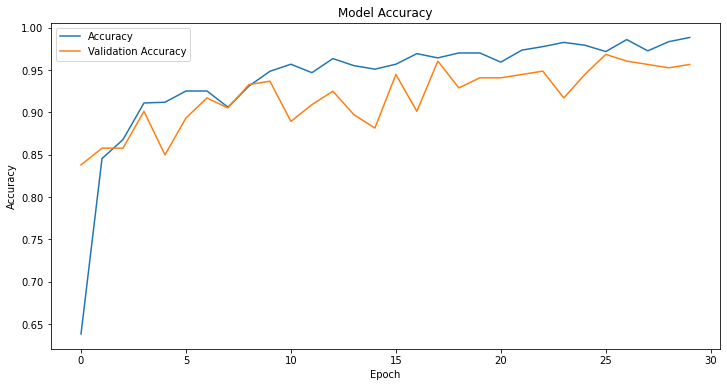

In [20]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
# plt.plot(model.history.history['loss'])
# plt.plot(model.history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

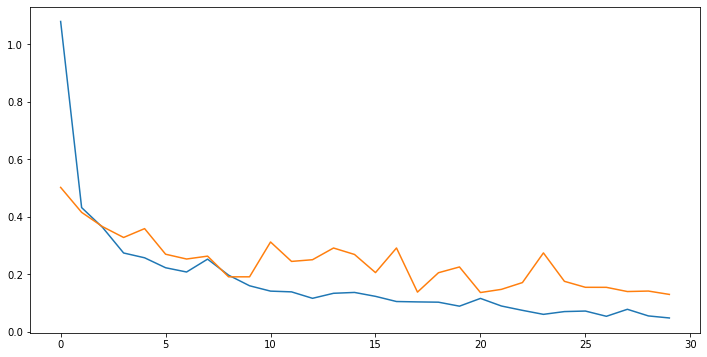

In [21]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [39]:
#Save the model as h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg16_multiclass.h5')

# **Testing**

### Example 1

1/1 [==============================] - 0s 205ms/step


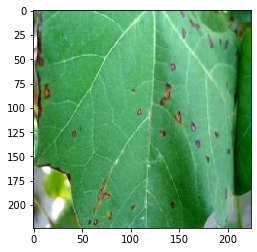

In [23]:
#Example 1

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("D:\\College\\cotton\\bacterial-blight.png", target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [24]:
preds

array([[9.9980861e-01, 9.7566890e-08, 3.3284687e-07, 1.9094413e-04]],
      dtype=float32)

In [25]:
training_set.class_indices

{'bacterial_blight': 0, 'curl_virus': 1, 'fussarium_wilt': 2, 'healthy': 3}

In [26]:
preds = np.argmax(preds, axis=1)

In [27]:
if preds==0:
  print("It is bacterial blight")
elif preds==1:
  print("It is curl virus")
elif preds==2:
  print("It is fussarium wilt")
else:
  print("It is a healthy plant")

It is bacterial blight


### Example 2

1/1 [==============================] - 0s 94ms/step


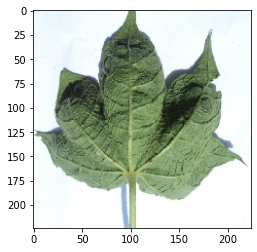

In [28]:
#Example 2

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img("D:\\College\\cotton\\curl.png" , target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [29]:
preds

array([[1.6283468e-07, 9.9999893e-01, 9.6776716e-07, 2.5426239e-10]],
      dtype=float32)

In [30]:
preds = np.argmax(preds, axis=1)

In [31]:
if preds==0:
  print("It is bacterial blight")
elif preds==1:
  print("It is curl virus")
elif preds==2:
  print("It is fussarium wilt")
else:
  print("It is a healthy plant")

It is curl virus


In [32]:
test_predictions = model.predict(test_set)

8/8 [==============================] - 20s 2s/step


In [33]:
test_predictions

array([[9.99931931e-01, 9.59653448e-07, 6.71047892e-05, 3.94844130e-10],
       [9.99906063e-01, 3.74291449e-06, 8.98883081e-05, 3.00227072e-07],
       [9.99727070e-01, 8.69637802e-07, 2.65971670e-04, 6.08497703e-06],
       ...,
       [1.07909300e-05, 1.94845626e-07, 1.26971975e-06, 9.99987721e-01],
       [1.37189545e-05, 6.01049578e-07, 1.39096110e-05, 9.99971747e-01],
       [4.94190954e-06, 2.47089559e-07, 2.23302195e-07, 9.99994636e-01]],
      dtype=float32)

In [34]:
test_labels = test_set.classes

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [36]:
confusion_matrix(test_labels, np.argmax(test_predictions, axis = 1))

array([[65,  0,  0,  0],
       [ 0, 61,  1,  0],
       [ 0,  2, 60,  0],
       [ 1,  0,  0, 63]], dtype=int64)

In [37]:
print(classification_report(test_labels, np.argmax(test_predictions, axis = 1)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       0.97      0.98      0.98        62
           2       0.98      0.97      0.98        62
           3       1.00      0.98      0.99        64

    accuracy                           0.98       253
   macro avg       0.98      0.98      0.98       253
weighted avg       0.98      0.98      0.98       253

